# Diabetes Prediction

This dataset contains **8 features**, based on which we can predict whether a particular person has diabetes or not.

The features and their description are as follows:

1) **Pregnancies**: Number of times pregnant
2) **Glucose**: Plasma glucose concentration (2 hours in an oral glucose tolerance test)
3) **BloodPressure**: Diastolic blood pressure (mm Hg)
4) **SkinThickness**: Triceps skin fold thickness (mm)
5) **Insulin**: 2-Hour serum insulin (mu U/ml)
6) **BMI**: Body mass index (weight in kg/(height in m)^2)
7) **DiabetesPedigreeFunction**: Diabetes pedigree function
8) **Age**: The person's age in years
9) **Outcome**: Diabetes (0 = no, 1 = yes)

### Load the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use("ggplot")
%matplotlib inline

### Load the dataset

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
#descriptive statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#no. of rows and columns
df.shape

(768, 9)

In [8]:
#distribution of outcome variable
df.Outcome.value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [9]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

This is an imbalanced dataset.

<Axes: xlabel='Age', ylabel='Count'>

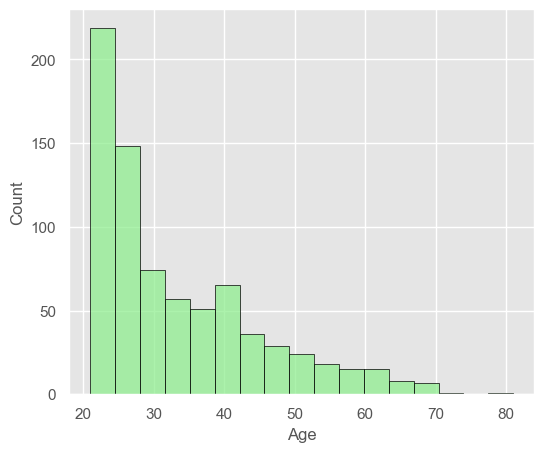

In [10]:
#plotting the histogram of the age variable

plt.figure(figsize=(6,5))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
sns.histplot(df['Age'], color='lightgreen', edgecolor='black')

In [11]:
#max and min age
print("MAX AGE:", df['Age'].max())
print("MIN AGE:", df['Age'].min())

MAX AGE: 81
MIN AGE: 21


<Axes: xlabel='Age', ylabel='Density'>

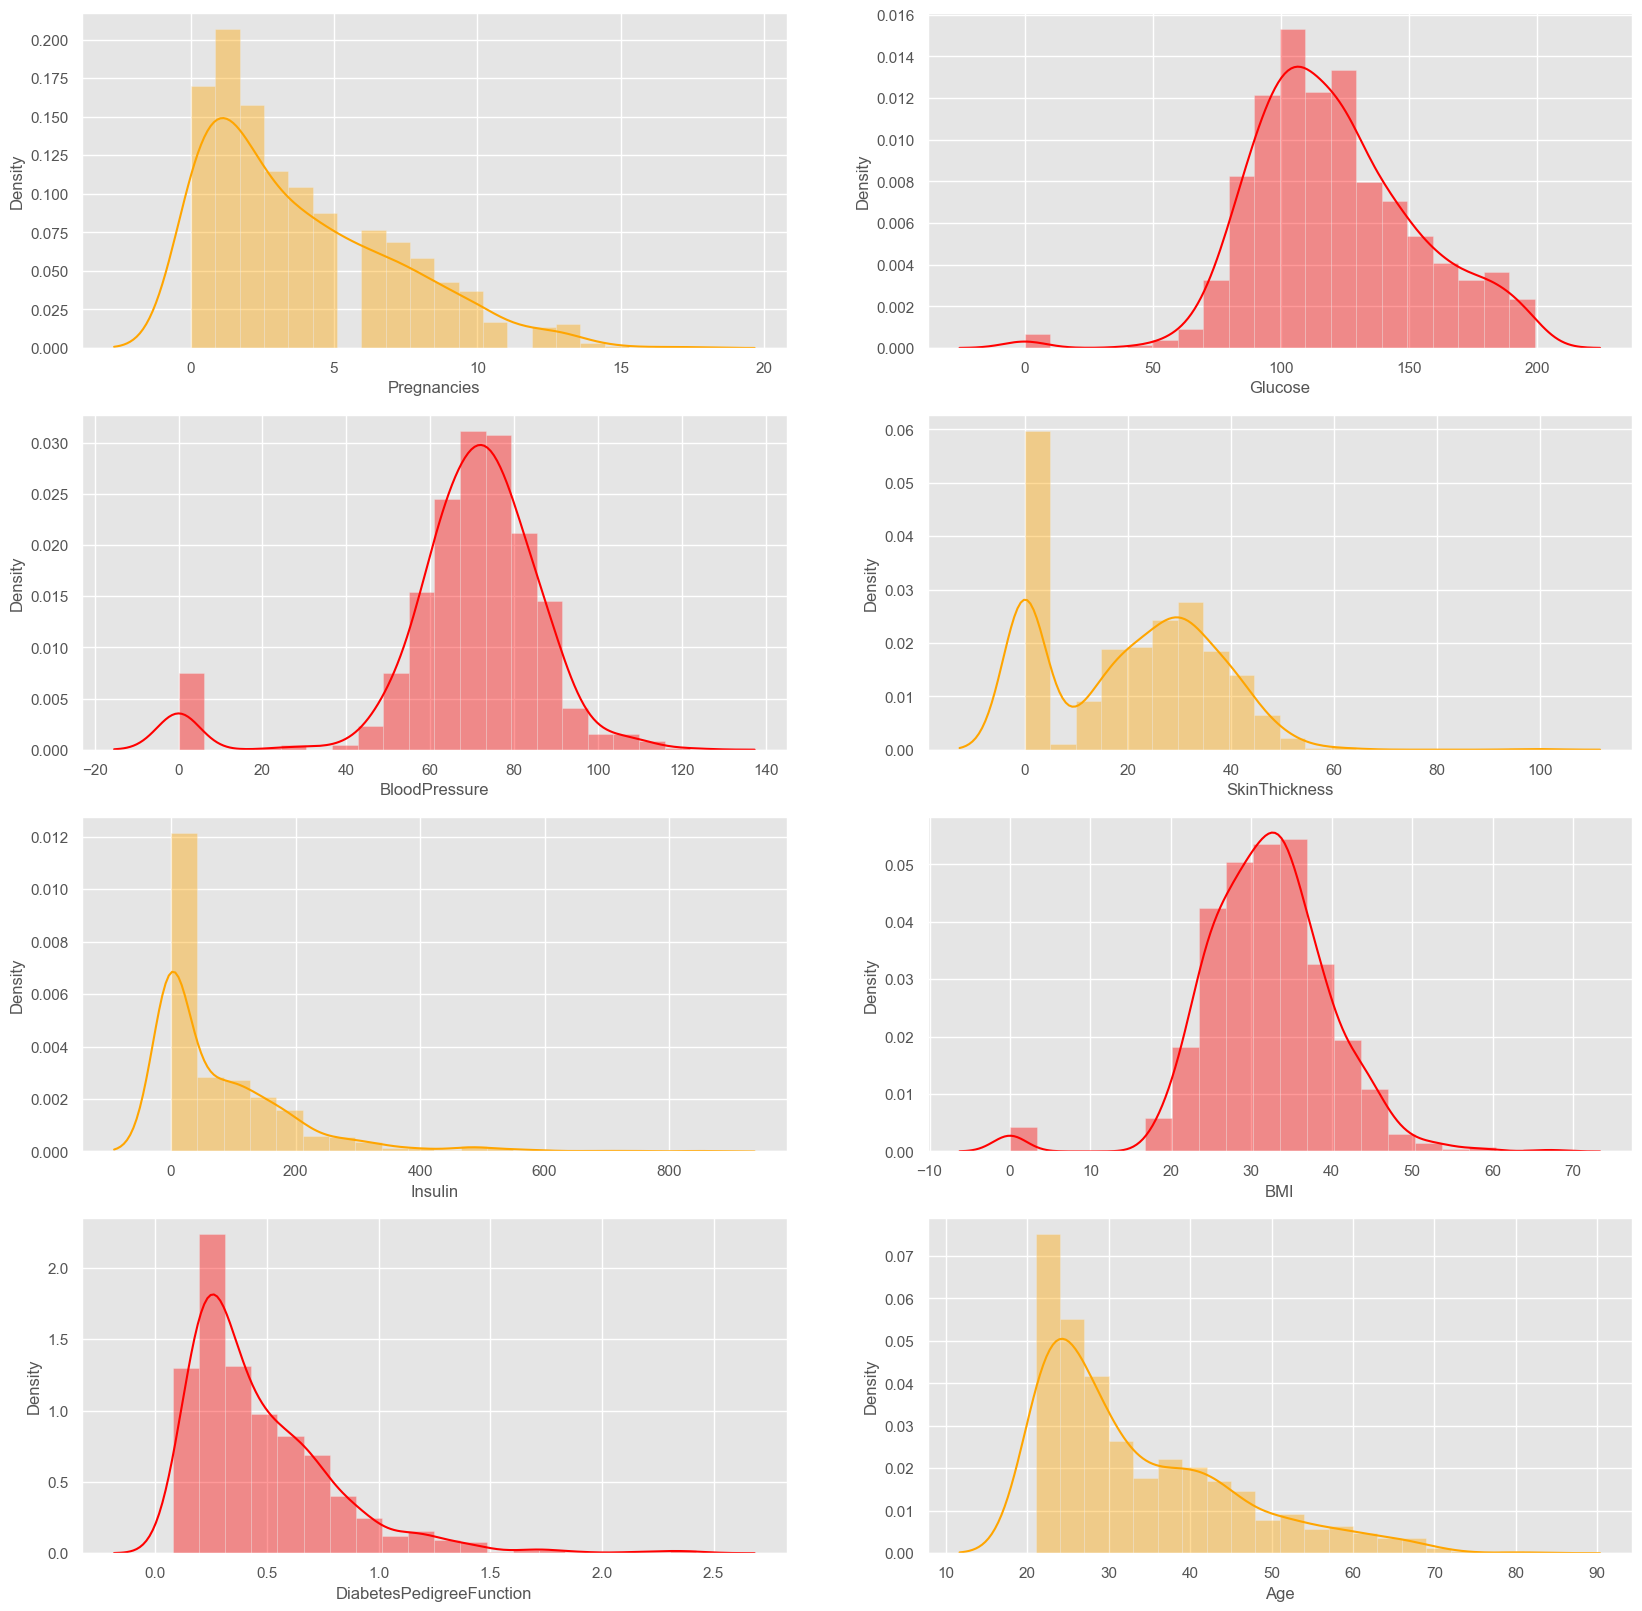

In [12]:
#plotting distribution plot for all variables

fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="orange")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="orange")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="orange")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="orange")


###### Pregnancies

In [13]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [14]:
df.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


###### Glucose

In [15]:
df.groupby("Outcome").agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [16]:
df.groupby("Outcome").agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


###### Age

In [17]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [18]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


###### Insulin

In [19]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [20]:
df.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


###### Blood Pressure

In [21]:
df.groupby("Outcome").agg({"BloodPressure": "mean"})

,BloodPressure
Outcome,
0,68.184000
1,70.824627


In [22]:
df.groupby("Outcome").agg({"BloodPressure": "max"})

,BloodPressure
Outcome,
0,122
1,114


###### BMI

In [23]:
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


In [24]:
df.groupby("Outcome").agg({"BMI": "max"})

,BMI
Outcome,
0,57.3
1,67.1


###### Skin Thickness

In [25]:
df.groupby("Outcome").agg({"SkinThickness": "mean"})

,SkinThickness
Outcome,
0,19.664000
1,22.164179


In [26]:
df.groupby("Outcome").agg({"SkinThickness": "max"})

,SkinThickness
Outcome,
0,60
1,99


###### Diabetes Pedigree Function

In [27]:
df.groupby("Outcome").agg({"DiabetesPedigreeFunction": "mean"})

,DiabetesPedigreeFunction
Outcome,
0,0.429734
1,0.550500


In [28]:
df.groupby("Outcome").agg({"DiabetesPedigreeFunction": "max"})

,DiabetesPedigreeFunction
Outcome,
0,2.329
1,2.420


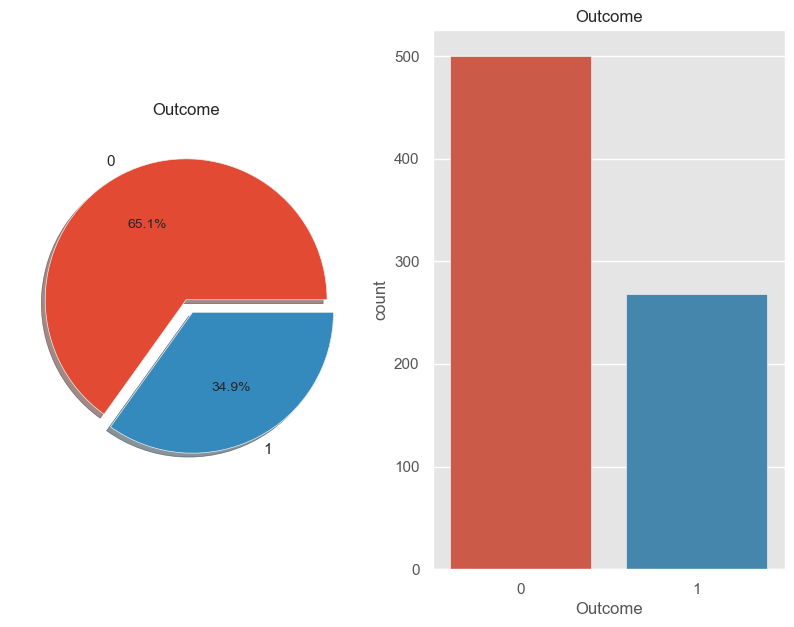

In [29]:
#visualizing the distribution of the outcome variable in the data (0 -> Healthy, 1 -> Diabetic)

fig, ax = plt.subplots(1,2, figsize=(10,7))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct = "%1.1f%%", shadow=True, ax=ax[0])
ax[0].set_title('Outcome', fontsize=12)
ax[0].set_ylabel('')

sns.countplot(data=df, x='Outcome', ax=ax[1])
ax[1].set_title('Outcome', fontsize=12)
plt.show()

In [30]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


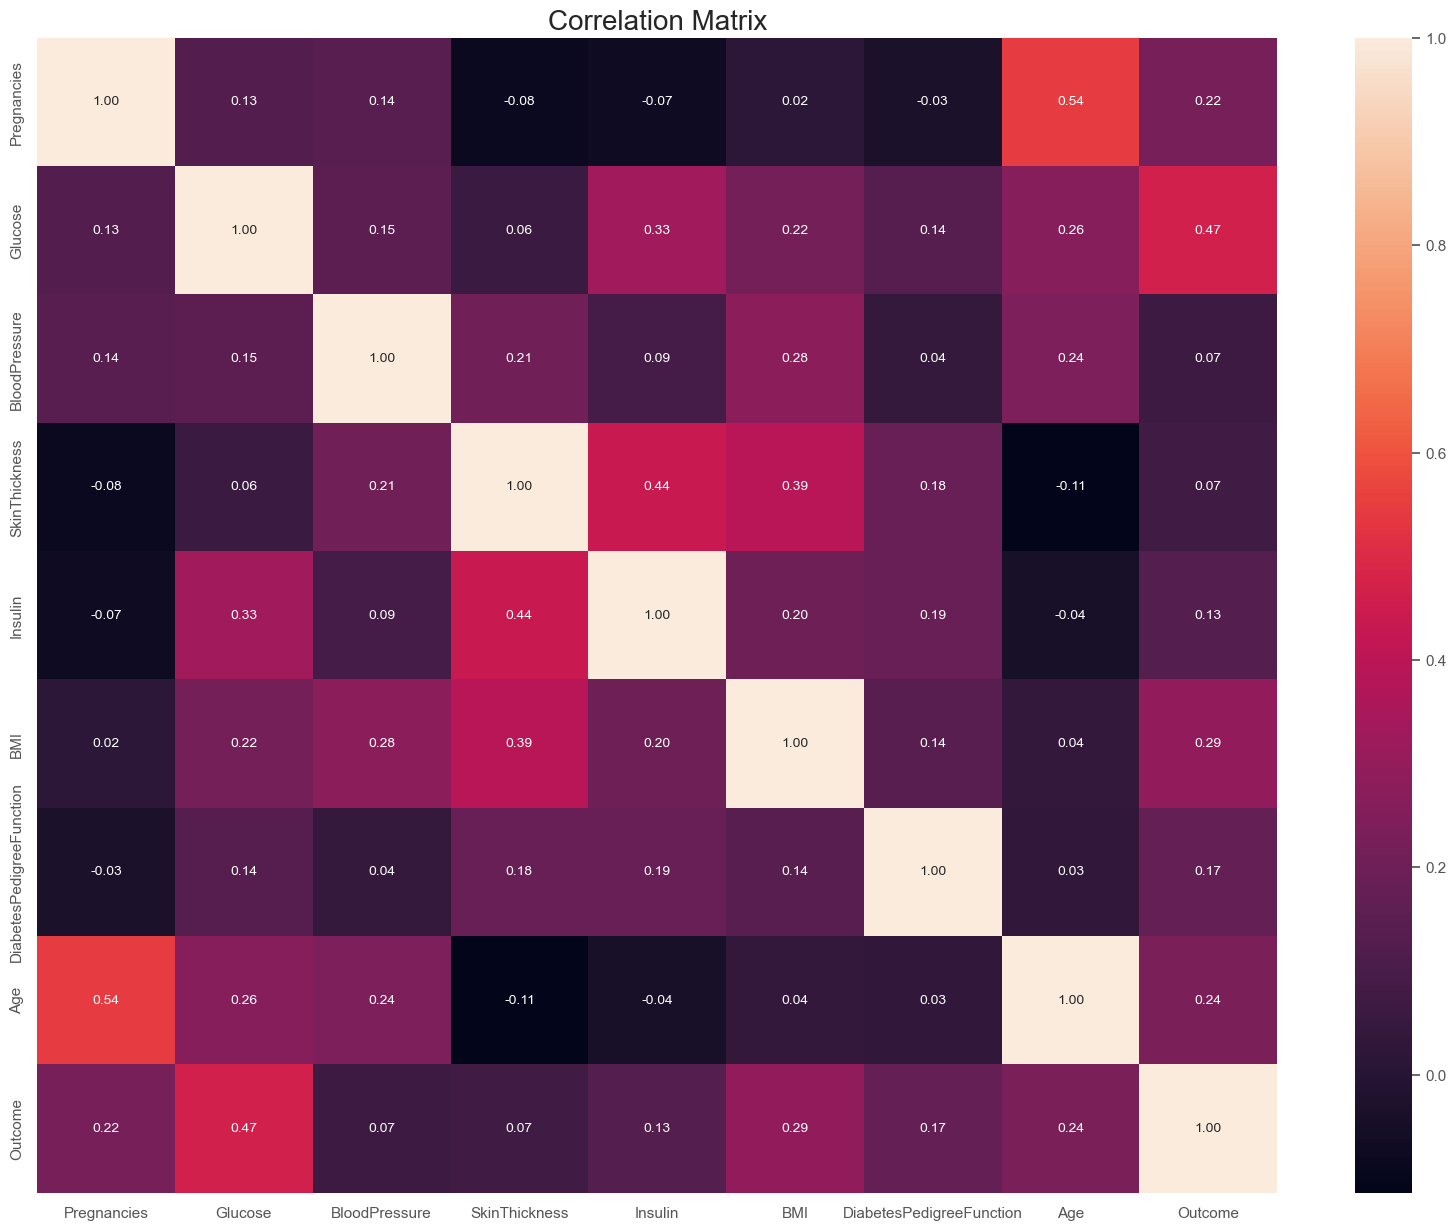

In [31]:
#correlation matrix
fig, ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax)
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

### Data Preprocessing

### Missing Values

In [32]:
#checking for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can see here that there are no null values. This is because the features contain 0 which is not possible. So, we need to replace 0 with NaN.

In [33]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
              'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                                   'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [34]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

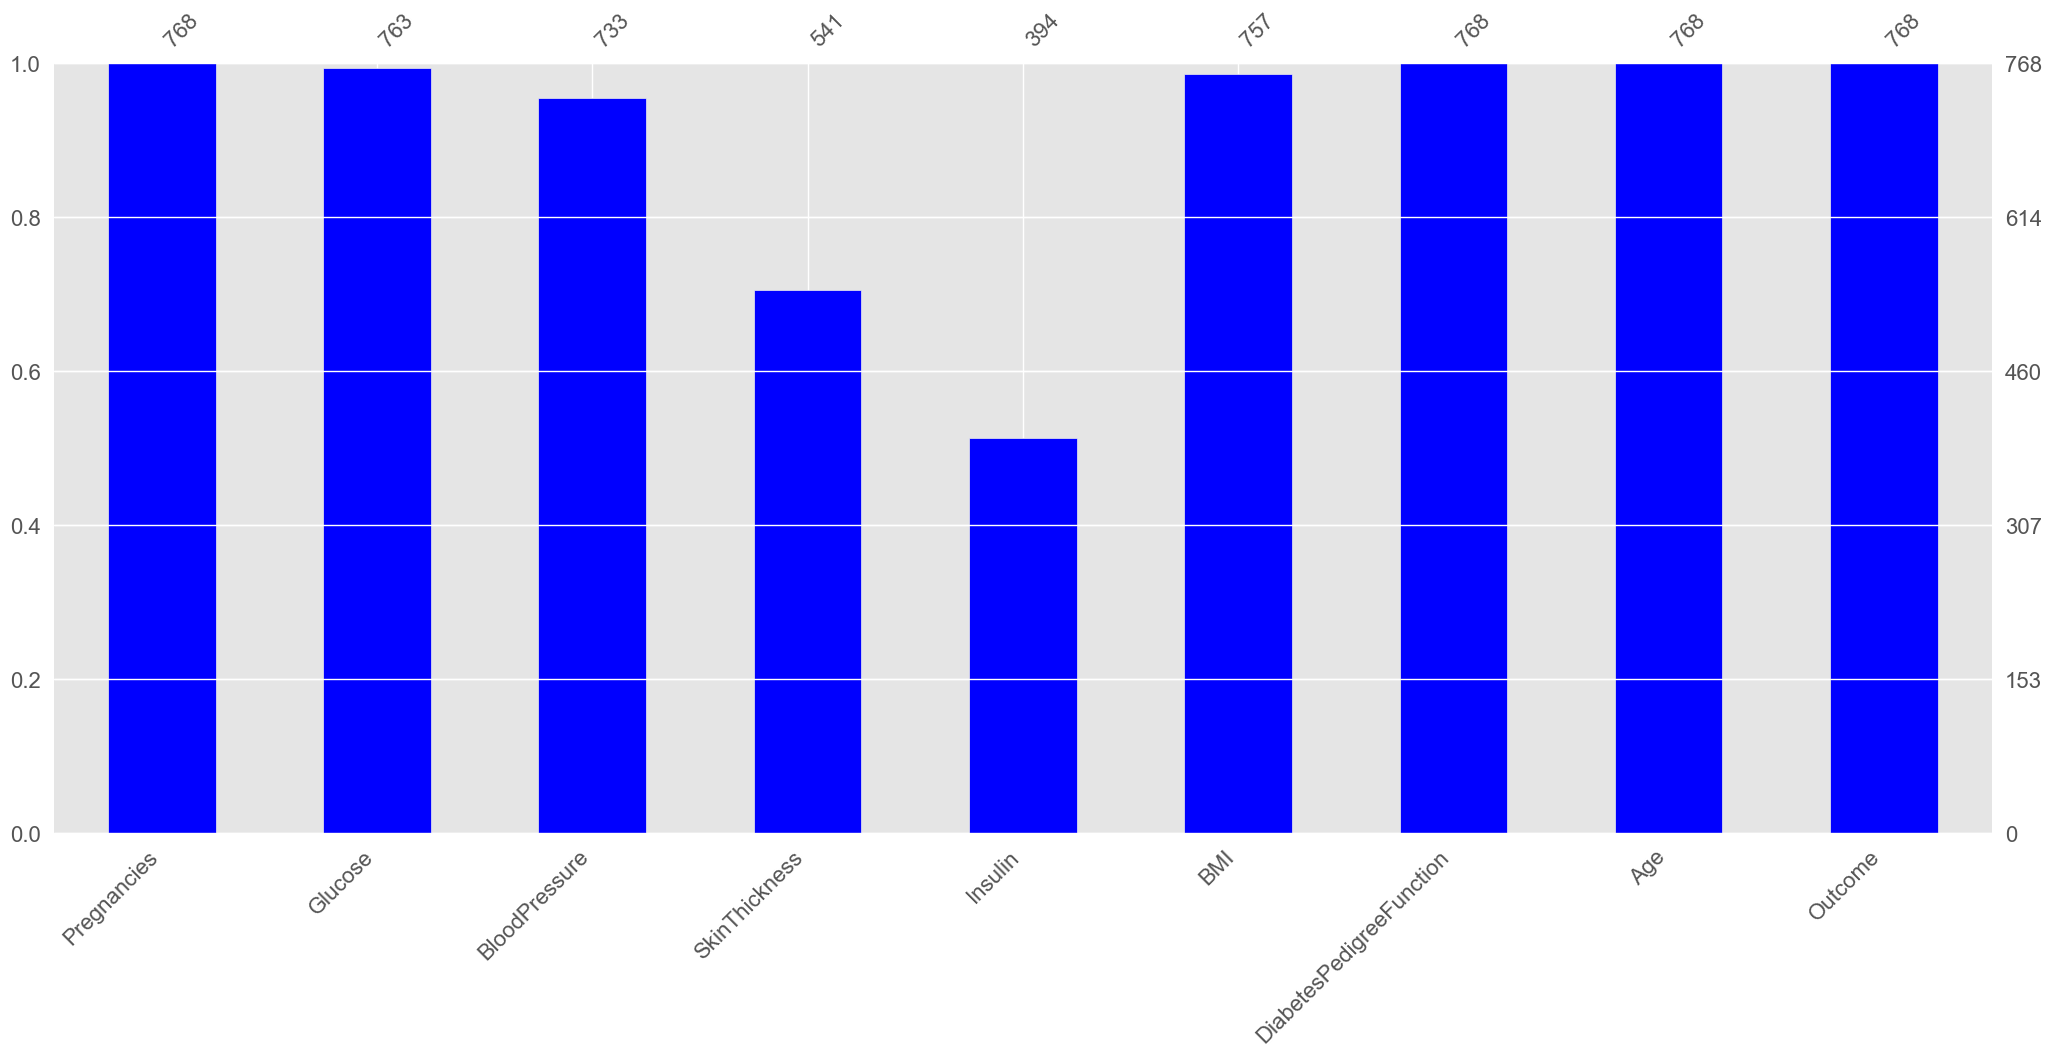

In [35]:
#visualizing the no. of missing values
import missingno as msno
msno.bar(df, color="blue")

In [36]:
#to find the median of respective column for each of the outcomes
def median(col):   
    temp = df[df[col].notnull()]
    temp = temp[[col, 'Outcome']].groupby(['Outcome'])[[col]].median().reset_index()
    return temp

In [37]:
#replacing missing values with median value
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median(i)[i][1]

In [38]:
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [39]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

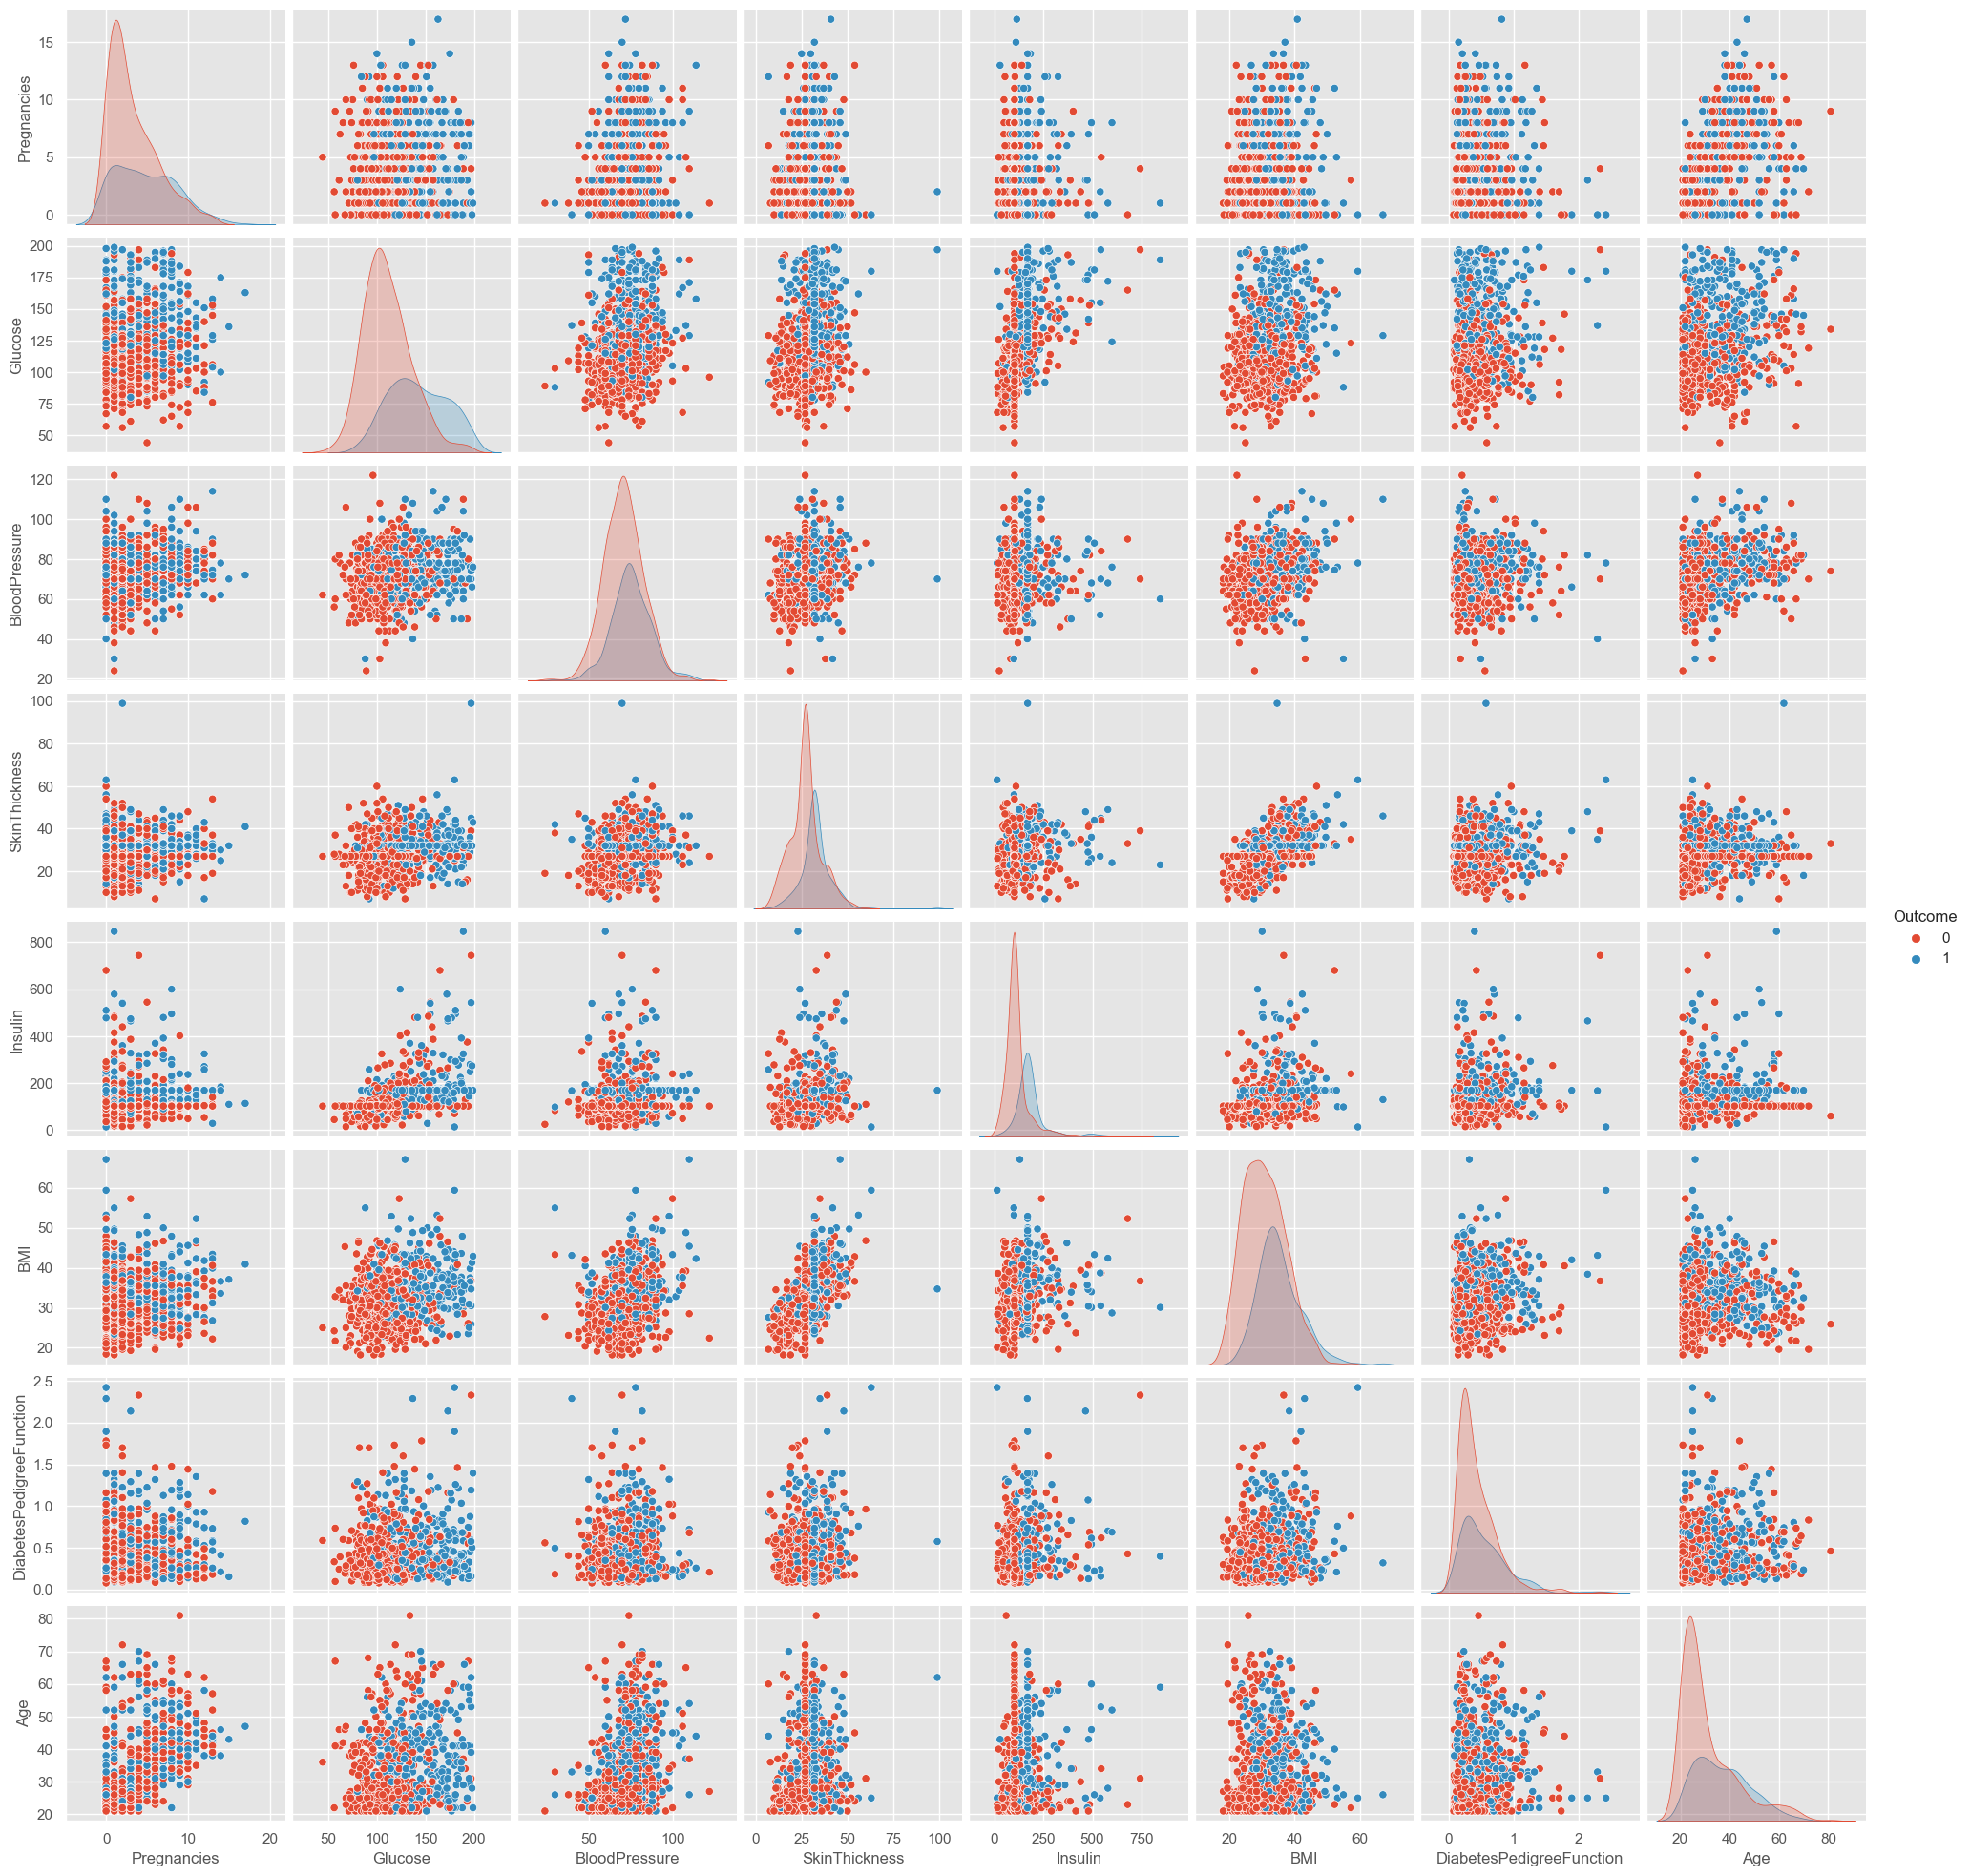

In [40]:
#pair plot
sns.pairplot(df, hue="Outcome")

### Outlier Detection

In [41]:
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    if df[(df[feature]>upper) | (df[feature]<lower)].any(axis=None):
        print(f"{feature}: YES")
    else:
        print(f"{feature}: NO")

Pregnancies: YES
Glucose: NO
BloodPressure: YES
SkinThickness: YES
Insulin: YES
BMI: YES
DiabetesPedigreeFunction: YES
Age: YES
Outcome: NO


<Axes: xlabel='Insulin'>

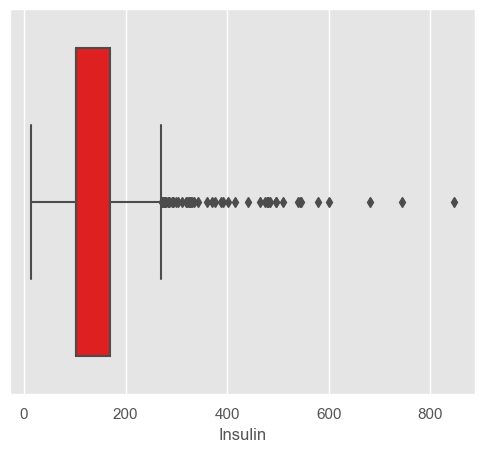

In [42]:
#boxplot visualization
plt.figure(figsize=(6,5))
sns.boxplot(x=df["Insulin"], color="red")

In [43]:
columns = df.columns
columns = columns.drop("Outcome", "Glucose")
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    if (col=="Pregnancies" or col=="Age"):
        mode_val = df[col].mode()[0]
        df.loc[(df[col]>upper) | (df[col]<lower), col] = mode_val
    else:
        median_val = df[col].median()
        df.loc[(df[col]>upper) | (df[col]<lower), col] = median_val

<Axes: xlabel='Insulin'>

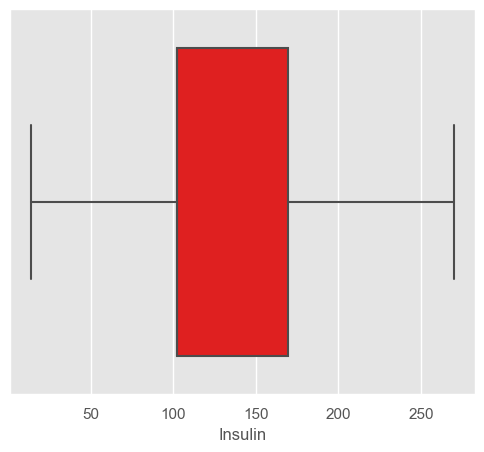

In [44]:
plt.figure(figsize=(6,5))
sns.boxplot(x=df["Insulin"], color="red")

Outliers have been imputed.

In [45]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.6270,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.3510,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.6720,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.1670,21,0
4,0,137.0,40.0,35.0,168.0,43.1,0.3725,33,1


In [46]:
df.shape

(768, 9)

### Feature Engineering

##### BMI

In [47]:
#function for classifying BMIs into different categories
def bmi_category(bmi):
    if (bmi<=18.5):
        return "Underweight"
    elif (bmi>18.5 and bmi<=24.9):
        return "Normal"
    elif (bmi>24.9 and bmi<=29.9):
        return "Overweight"
    elif (bmi>29.9 and bmi<=34.9):
        return "Obesity 1"
    elif (bmi>34.9 and bmi<=39.9):
        return "Obesity 2"
    else:
        return "Obesity 3"

In [48]:
df["BMI_Cat"] = df["BMI"].apply(bmi_category)

In [49]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Cat
0,6,148.0,72.0,35.0,169.5,33.6,0.6270,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.3510,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.6720,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.1670,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,0.3725,33,1,Obesity 3


In [50]:
print(df["BMI_Cat"].dtype)

object


In [51]:
#changing the datatype 
df["BMI_Cat"] = df["BMI_Cat"].astype("category")

In [52]:
print(df["BMI_Cat"].dtype)

category


##### Insulin

In [53]:
#classifying insulin level
def set_insulin(insulin):
    if insulin>=16 and insulin<=166:
        return "Normal"
    else:
        return "Abnormal"

In [54]:
df["Insulin_Cat"] = df["Insulin"].apply(set_insulin)

In [55]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Cat,Insulin_Cat
0,6,148.0,72.0,35.0,169.5,33.6,0.6270,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.3510,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.6720,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.1670,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,0.3725,33,1,Obesity 3,Abnormal


In [56]:
#changing the datatype 
df["Insulin_Cat"] = df["Insulin_Cat"].astype("category")

##### Glucose

In [57]:
#function for classifying Glucose into different categories
def glucose_category(glucose):
    if (glucose<=70):
        return "Low"
    elif (glucose>70 and glucose<=99):
        return "Normal"
    elif (glucose>99 and glucose<=126):
        return "High"
    else:
        return "Extremely High"

In [58]:
df["Glucose_Cat"] = df["Glucose"].apply(glucose_category)

In [59]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Cat,Insulin_Cat,Glucose_Cat
0,6,148.0,72.0,35.0,169.5,33.6,0.6270,50,1,Obesity 1,Abnormal,Extremely High
1,1,85.0,66.0,29.0,102.5,26.6,0.3510,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.6720,32,1,Normal,Abnormal,Extremely High
3,1,89.0,66.0,23.0,94.0,28.1,0.1670,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,0.3725,33,1,Obesity 3,Abnormal,Extremely High


In [60]:
#changing the datatype 
df["Glucose_Cat"] = df["Glucose_Cat"].astype("category")

### One Hot Encoding

In [61]:
df = pd.get_dummies(df,  columns = ["BMI_Cat", "Insulin_Cat", "Glucose_Cat"], drop_first=True, dtype=int)

In [62]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Cat_Obesity 1,BMI_Cat_Obesity 2,BMI_Cat_Obesity 3,BMI_Cat_Overweight,BMI_Cat_Underweight,Insulin_Cat_Normal,Glucose_Cat_High,Glucose_Cat_Low,Glucose_Cat_Normal
0,6,148.0,72.0,35.0,169.5,33.6,0.6270,50,1,1,0,0,0,0,0,0,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.3510,31,0,0,0,0,1,0,1,0,0,1
2,8,183.0,64.0,32.0,169.5,23.3,0.6720,32,1,0,0,0,0,0,0,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.1670,21,0,0,0,0,1,0,1,0,0,1
4,0,137.0,40.0,35.0,168.0,43.1,0.3725,33,1,0,0,1,0,0,0,0,0,0


In [63]:
X = df.drop(["Outcome"], axis=1)

y = df["Outcome"]

##### Train Test Split

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=150, stratify=y)

In [65]:
#scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train.iloc[:, 0:8] = scaler.fit_transform(X_train.iloc[:, 0:8])

In [66]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,BMI_Cat_Obesity 1,BMI_Cat_Obesity 2,BMI_Cat_Obesity 3,BMI_Cat_Overweight,BMI_Cat_Underweight,Insulin_Cat_Normal,Glucose_Cat_High,Glucose_Cat_Low,Glucose_Cat_Normal
340,-0.831738,0.275811,-0.163745,-0.078102,-0.357270,-0.958672,0.189293,-0.955961,0,0,0,1,0,1,0,0,0
241,0.082380,-0.987496,-0.163745,0.594948,-0.732477,0.156089,0.084403,-0.955961,1,0,0,0,0,1,0,0,1
652,0.387086,0.049064,0.216366,1.941048,-0.975258,0.310917,-0.629655,-0.404220,1,0,0,0,0,1,1,0,0
86,2.824734,-0.501609,0.026311,-0.078102,-0.412447,0.697986,-0.996770,1.159044,0,1,0,0,0,1,1,0,0
632,-0.527032,-0.339646,-1.114023,-0.246365,-0.412447,-0.912224,-0.331122,-0.864004,0,0,0,1,0,1,1,0,0


In [67]:
X_test.iloc[:, 0:8] = scaler.transform(X_test.iloc[:, 0:8])
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,BMI_Cat_Obesity 1,BMI_Cat_Obesity 2,BMI_Cat_Obesity 3,BMI_Cat_Overweight,BMI_Cat_Underweight,Insulin_Cat_Normal,Glucose_Cat_High,Glucose_Cat_Low,Glucose_Cat_Normal
371,-1.136444,-0.112899,-0.733912,-0.919415,-0.710406,-0.308395,-0.212112,-1.047917,1,0,0,0,0,1,1,0,0
106,-0.831738,-0.825533,0.026311,-0.246365,-0.412447,-1.500570,-0.879777,-0.496177,0,0,0,0,0,1,0,0,1
36,2.215322,0.534951,0.406422,-0.246365,-0.412447,0.171571,-0.020487,0.239477,1,0,0,0,0,1,0,0,0
358,2.520028,-1.084673,0.216366,1.941048,-1.482891,0.496710,-0.189924,1.434914,0,1,0,0,0,1,0,0,1
523,1.605910,0.275811,-0.163745,0.594948,1.066310,0.326399,0.915455,1.159044,1,0,0,0,0,0,0,0,0


### Model Training

### Logistic Regreesion

In [68]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [69]:
y_pred = lr.predict(X_test)

In [70]:
#checking accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#on train set
accuracy_score(y_train, lr.predict(X_train))

0.8583061889250815

In [71]:
#on test set
lr_acc = accuracy_score(y_test, y_pred)
lr_acc

0.8376623376623377

In [72]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[89, 11],
       [14, 40]], dtype=int64)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       100
           1       0.78      0.74      0.76        54

    accuracy                           0.84       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.84      0.84      0.84       154



### KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [75]:
y_pred = knn.predict(X_test)

In [76]:
#accuracy on train set
accuracy_score(y_train, knn.predict(X_train))

0.8925081433224755

In [77]:
#accuracy on test set
knn_acc = accuracy_score(y_test, y_pred)
knn_acc

0.8636363636363636

In [78]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[91,  9],
       [12, 42]], dtype=int64)

In [79]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       100
           1       0.82      0.78      0.80        54

    accuracy                           0.86       154
   macro avg       0.85      0.84      0.85       154
weighted avg       0.86      0.86      0.86       154



### SVM

In [80]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [81]:
#best parameter
grid_search.best_params_

{'C': 1, 'gamma': 0.1}

In [82]:
grid_search.best_score_

0.87786218845795

In [83]:
svc = SVC(C=10, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [84]:
#accuracy on train set
accuracy_score(y_train, svc.predict(X_train))

0.8762214983713354

In [85]:
#accuracy on test set
svc_acc = accuracy_score(y_test, y_pred)
svc_acc

0.8376623376623377

In [86]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[89, 11],
       [14, 40]], dtype=int64)

In [87]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       100
           1       0.78      0.74      0.76        54

    accuracy                           0.84       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.84      0.84      0.84       154



### Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [89]:
#accuracy on train set
accuracy_score(y_train, svc.predict(X_train))

0.8762214983713354

In [90]:
#accuracy on test set
dt_acc = accuracy_score(y_test, y_pred)
dt_acc

0.8051948051948052

In [91]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[83, 17],
       [13, 41]], dtype=int64)

In [92]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       100
           1       0.71      0.76      0.73        54

    accuracy                           0.81       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154



In [93]:
#hyperparameter tuning of decision tree
from sklearn.model_selection import GridSearchCV

grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7], 
    'min_samples_split':[1,2,3,5,7], 
    'max_features':['auto','sqrt','log2']
}

grid_search_dt = GridSearchCV(dt, grid_param, cv=50)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=50, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']})

In [94]:
#best parameters
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'best'}

In [95]:
#best score
grid_search_dt.best_score_

0.8519230769230769

In [96]:
dt = grid_search_dt.best_estimator_
y_pred = dt.predict(X_test)

#accuracy on train set
accuracy_score(y_train, dt.predict(X_train))

0.9283387622149837

In [97]:
#accuracy on test set
dt_acc = accuracy_score(y_test, y_pred)
dt_acc

0.8701298701298701

In [98]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[93,  7],
       [13, 41]], dtype=int64)

In [99]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       100
           1       0.85      0.76      0.80        54

    accuracy                           0.87       154
   macro avg       0.87      0.84      0.85       154
weighted avg       0.87      0.87      0.87       154



### Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [101]:
y_pred = rf.predict(X_test)

#accuracy on train set
accuracy_score(y_train, rf.predict(X_train))

0.995114006514658

In [102]:
#accuracy on test set
rf_acc = accuracy_score(y_test, y_pred)
rf_acc

0.8896103896103896

In [103]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[92,  8],
       [ 9, 45]], dtype=int64)

In [104]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       100
           1       0.85      0.83      0.84        54

    accuracy                           0.89       154
   macro avg       0.88      0.88      0.88       154
weighted avg       0.89      0.89      0.89       154



### Gradient Boosting

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gb = GridSearchCV(gb, parameters, cv = 10)
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]})

In [106]:
#best parameters
grid_search_gb.best_params_

{'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 200}

In [107]:
#best score
grid_search_gb.best_score_

0.8681385510312005

In [108]:
gb = grid_search_gb.best_estimator_
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [109]:
#accuracy on train set
accuracy_score(y_train, gb.predict(X_train))

1.0

In [110]:
#accuracy on test set
gb_acc = accuracy_score(y_test, y_pred)
gb_acc

0.8701298701298701

In [111]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[87, 13],
       [ 7, 47]], dtype=int64)

In [112]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       100
           1       0.78      0.87      0.82        54

    accuracy                           0.87       154
   macro avg       0.85      0.87      0.86       154
weighted avg       0.88      0.87      0.87       154



### XG Boost

In [113]:
from xgboost import XGBClassifier

xg = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [114]:
y_pred = xg.predict(X_test)

#accuracy on train set
accuracy_score(y_train, xg.predict(X_train))

0.9804560260586319

In [115]:
#accuracy on test set
xg_acc = accuracy_score(y_test, y_pred)
xg_acc

0.8961038961038961

In [116]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[93,  7],
       [ 9, 45]], dtype=int64)

In [117]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       100
           1       0.87      0.83      0.85        54

    accuracy                           0.90       154
   macro avg       0.89      0.88      0.88       154
weighted avg       0.90      0.90      0.90       154



### Models Comaprison

In [118]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(lr_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dt_acc,4), 100*round(rf_acc,4), 
              100*round(gb_acc,4), 100*round(xg_acc,4)]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,XgBoost,89.61
4,Random Forest Classifier,88.96
3,Decision Tree Classifier,87.01
5,Gradient Boosting Classifier,87.01
1,KNN,86.36
0,Logistic Regression,83.77
2,SVM,83.77


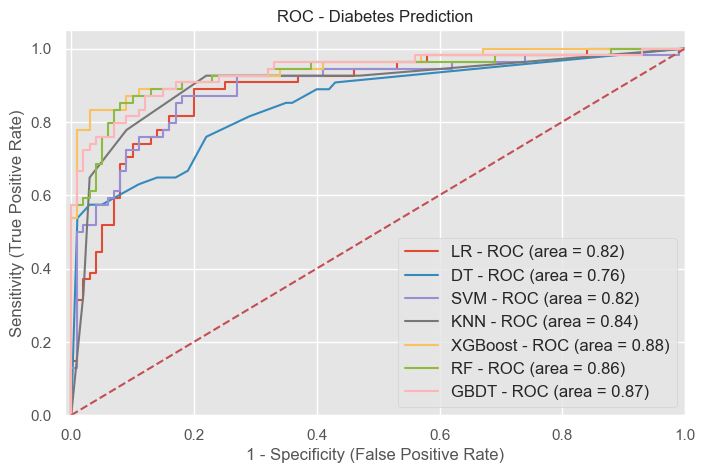

In [119]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dt,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xg,
},
{
    'label': 'RF',
    'model': rf,
},
{
    'label': 'GBDT',
    'model': gb,
}]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test, model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

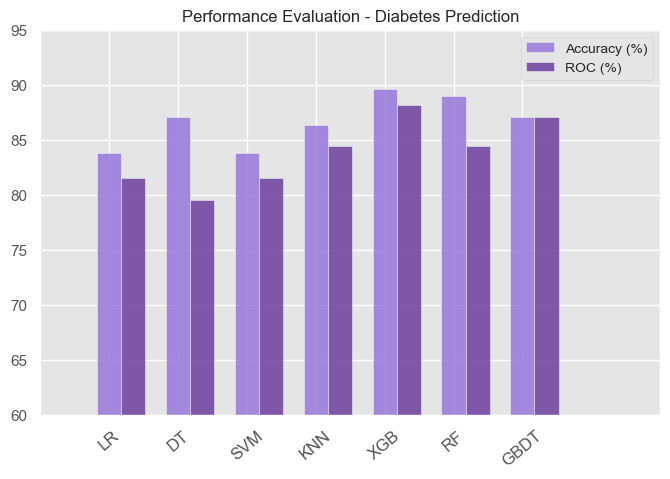

In [120]:
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dt,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xg,
},
{
    'label': 'RF',
    'model': rf,
},
{
    'label': 'GBDT',
    'model': gb,
}
]

means_roc = []
means_accuracy = [100*round(lr_acc,4), 100*round(dt_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xg_acc,4), 
                  100*round(rf_acc,4), 100*round(gb_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)


#data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

#create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([60, 95])

plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index, ('LR', 'DT', 'SVM', 'KNN', 'XGB' , 'RF', 'GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [121]:
import pickle
model = rf
pickle.dump(model, open("diabetes.pkl",'wb'))

In [122]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']